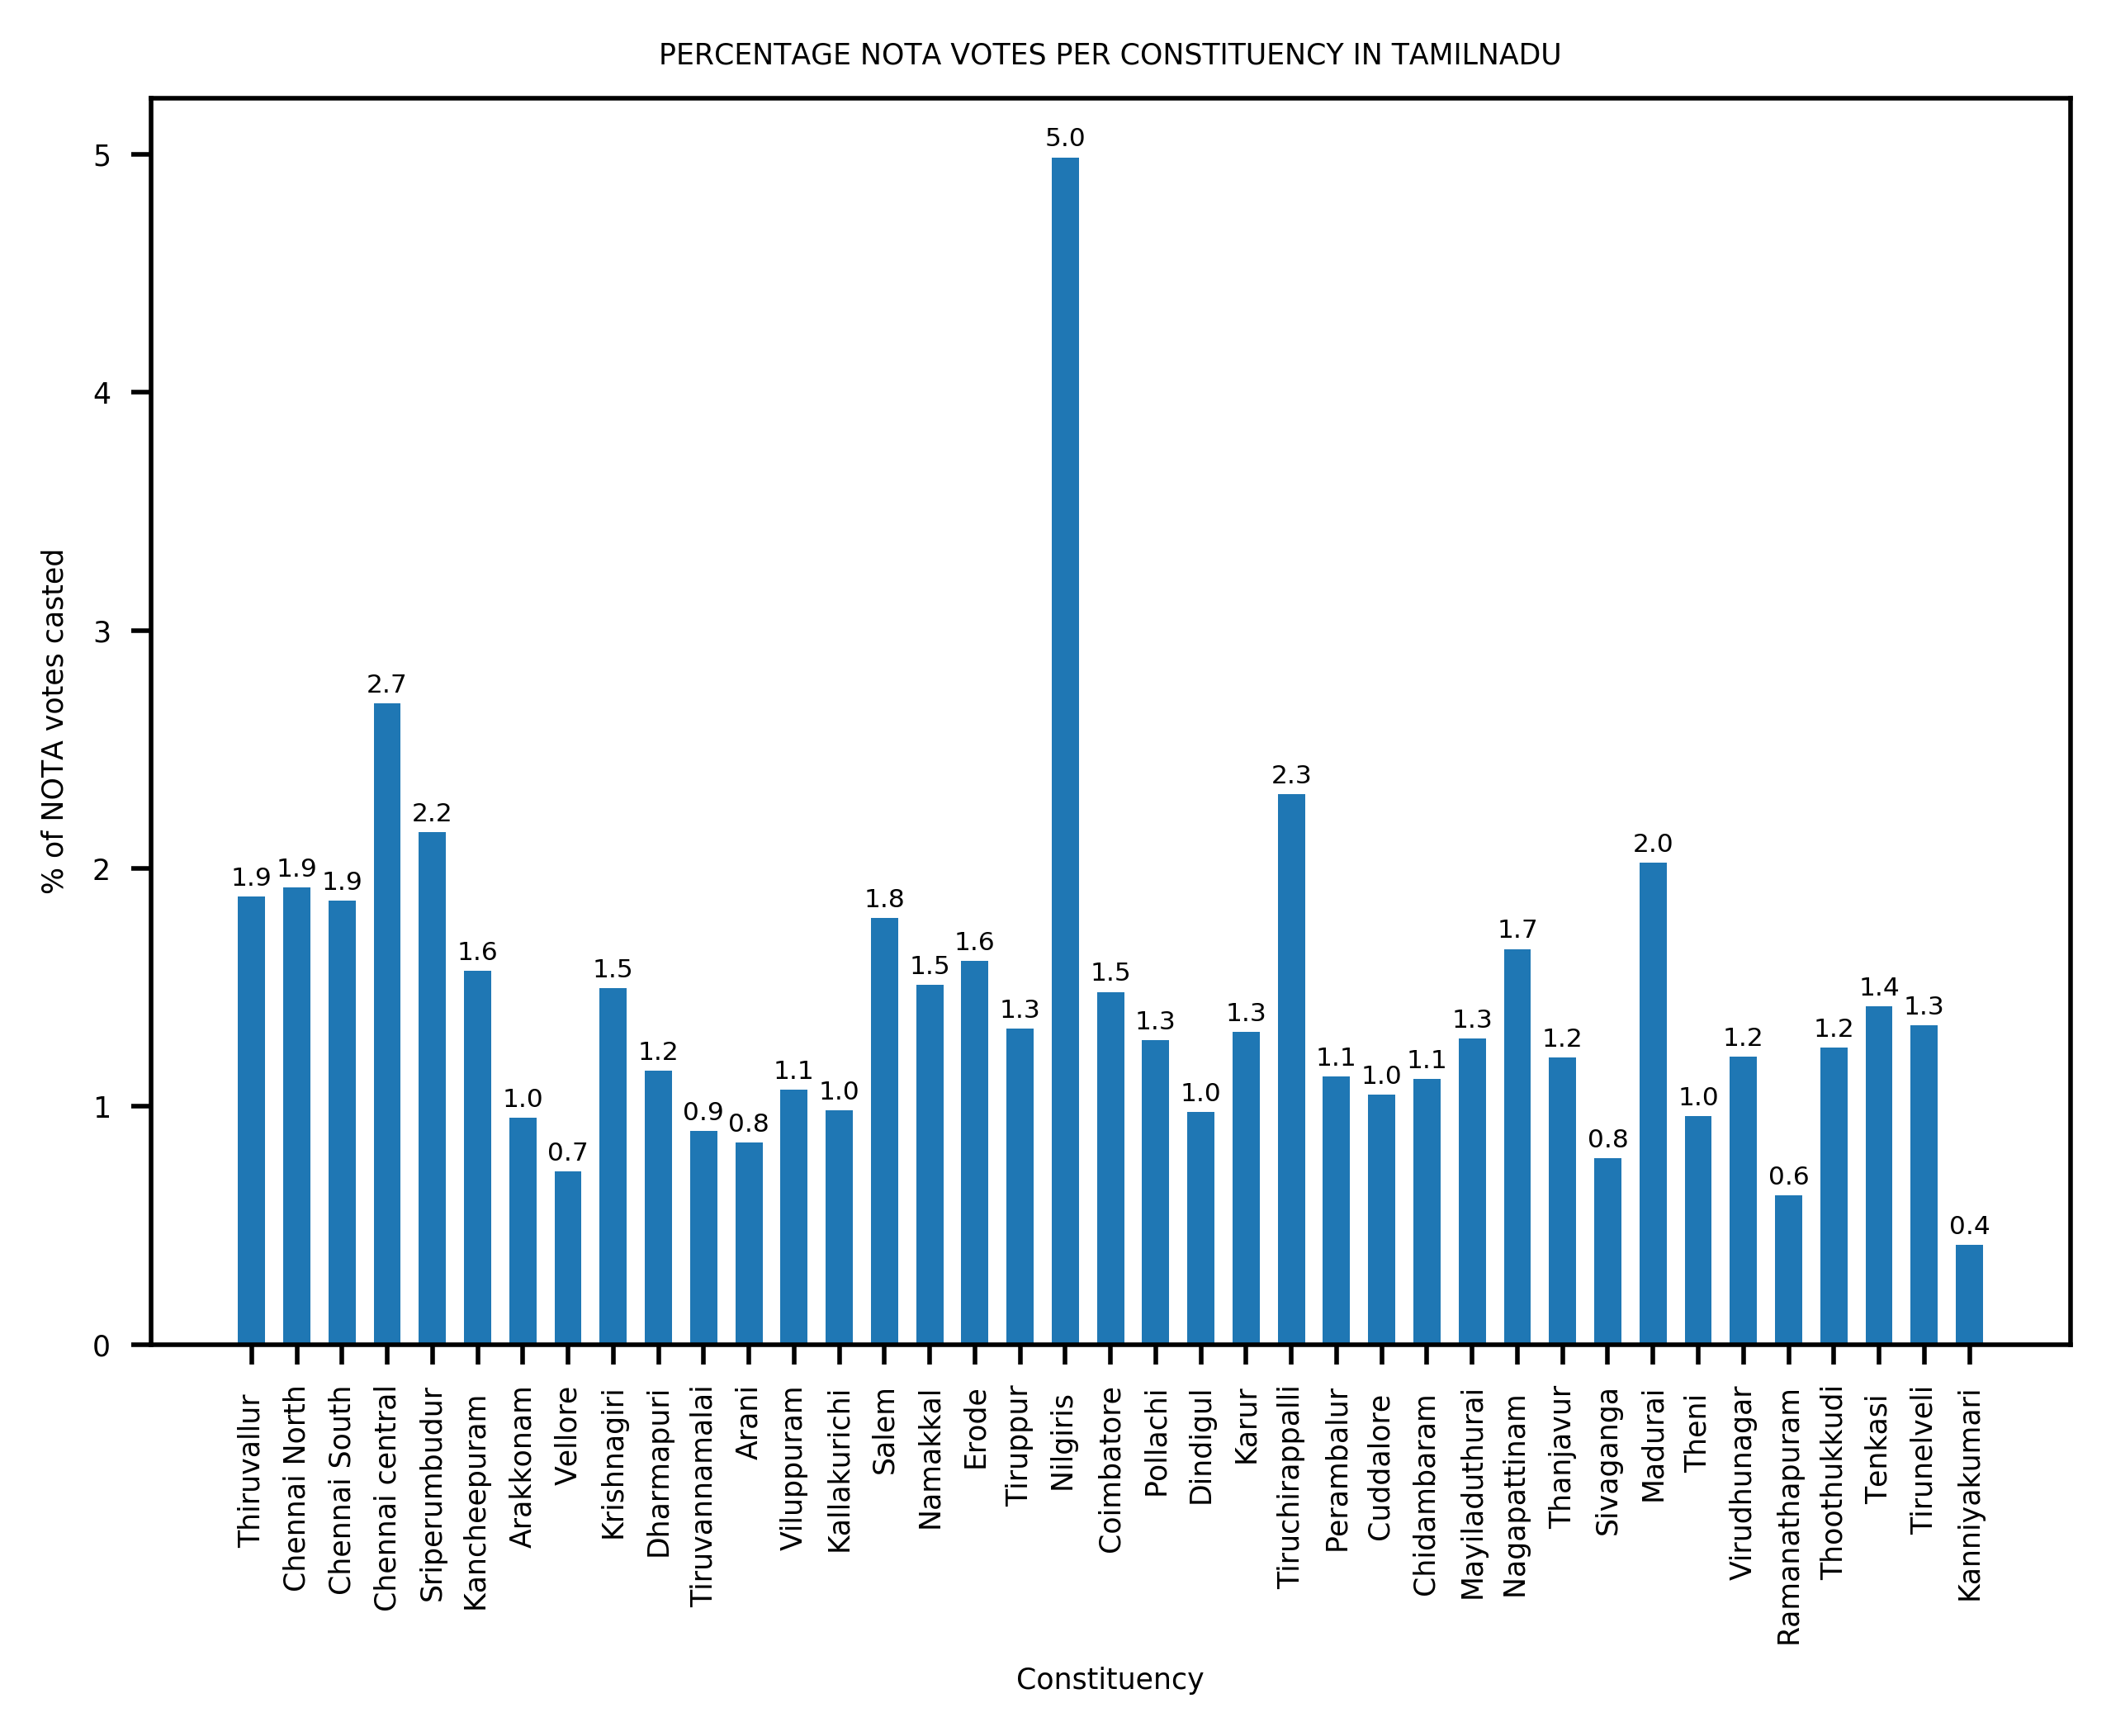

In [85]:
#PERCENTAGE NOTA VOTES PER CONSTITUENCY IN TAMILNADU
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean,median
from pprint import pprint

df=pd.read_csv('2014.csv')

#See % of NOTA votes in each constituency in TamilNadu
df=df[df['TERRITORY']=='Tamil Nadu']
df=df[['CONSTITUENCY','PARTY','% OF TOTAL POLLED']]
df=df[df['PARTY']=='NOTA']

plt.bar(df['CONSTITUENCY'],df['% OF TOTAL POLLED'],width=0.6)
plt.xticks(rotation=90,fontsize=5)
plt.yticks(fontsize=5)
plt.title('PERCENTAGE NOTA VOTES PER CONSTITUENCY IN TAMILNADU',fontsize=5)
plt.xlabel('Constituency',fontsize=5)
plt.ylabel('% of NOTA votes casted',fontsize=5)

for (i,v) in enumerate(df['% OF TOTAL POLLED']):
    plt.text(x=i,y=v+0.075,s=f"{round(v,1)}",ha="center",va="center",fontdict=dict(fontsize=4.5))



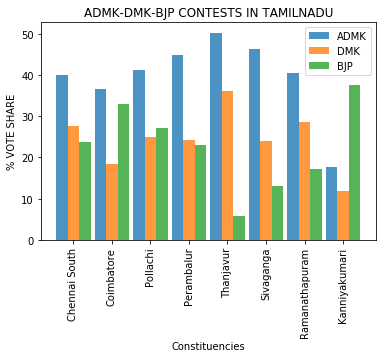

In [23]:
#ADMK-DMK-BJP CONTESTS IN TAMILNADU

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean,median
from pprint import pprint

df=pd.read_csv('2014.csv')

df=df[df['TERRITORY']=='Tamil Nadu']
df=df[['CONSTITUENCY','PARTY','% OF TOTAL POLLED']]
ADMK=df[df['PARTY']=='ADMK']
DMK=df[df['PARTY']=='DMK']
BJP=df[df['PARTY']=='BJP']

Common_DMK_ADMK = list(set(ADMK['CONSTITUENCY']).intersection(set(DMK['CONSTITUENCY'])))
#Constituencies Fought By DMK Allies
DMK_Allies = set(ADMK['CONSTITUENCY']).difference(Common_DMK_ADMK)

Common_DMK_ADMK_BJP = list(set(ADMK['CONSTITUENCY']).intersection(set(DMK['CONSTITUENCY'])).intersection(set(BJP['CONSTITUENCY'])))

ADMK_Stats = zip(ADMK['CONSTITUENCY'],ADMK['% OF TOTAL POLLED'])
DMK_Stats = zip(DMK['CONSTITUENCY'],DMK['% OF TOTAL POLLED'])
BJP_Stats = zip(BJP['CONSTITUENCY'],BJP['% OF TOTAL POLLED'])

admk_share=[]
dmk_share=[]
bjp_share=[]

for item in ADMK_Stats:
    if item[0] in Common_DMK_ADMK_BJP:
        admk_share.append(item)
for item in DMK_Stats:
    if item[0] in Common_DMK_ADMK_BJP:
        dmk_share.append(item)
for item in BJP_Stats:
    if item[0] in Common_DMK_ADMK_BJP:
        bjp_share.append(item)
        
ToPlot=[]
for i in range(len(admk_share)):
    ToPlot.append((admk_share[i][0],admk_share[i][1],dmk_share[i][1],bjp_share[i][1]))

index=np.arange(len(ToPlot))
barWidth=0.35

#THE PLOT
n_groups = len(ToPlot)
ADMK = tuple(map(lambda x:x[1],ToPlot))
DMK = tuple(map(lambda x:x[2],ToPlot))
BJP = tuple(map(lambda x:x[3],ToPlot))

index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

rects1 = plt.bar(index, ADMK, bar_width,alpha=opacity,label='ADMK')
rects2 = plt.bar(index + bar_width, DMK, bar_width,alpha=opacity,label='DMK')
rects3 = plt.bar(index + 2*bar_width, BJP, bar_width,alpha=opacity,label='BJP')

plt.xlabel('Constituencies')
plt.ylabel('% VOTE SHARE')
plt.title('ADMK-DMK-BJP CONTESTS IN TAMILNADU')
plt.xticks(index + bar_width, tuple(map(lambda x:x[0],ToPlot)),rotation=90)
plt.legend()